# The Ames housing dataset

In this notebook, we will quickly present the "Ames housing" dataset. We will
see that this dataset is similar to the "California housing" dataset.
However, it is more complex to handle: it contains missing data and both
numerical and categorical features.

This dataset is located in the `datasets` directory. It is stored in a comma
separated value (CSV) file. As previously mentioned, we are aware that the
dataset contains missing values. The character `"?"` is used as a missing
value marker.

We will open the dataset and specify the missing value marker such that they
will be parsed by pandas when opening the file.

In [1]:
import pandas as pd

ames_housing = pd.read_csv("../datasets/house_prices.csv", na_values='?')
ames_housing = ames_housing.drop(columns="Id")

We can have a first look at the available columns in this dataset.

In [2]:
ames_housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


We see that the last column named `"SalePrice"` is indeed the target that we
would like to predict. So we will split our dataset into two variables
containing the data and the target.

In [3]:
target_name = "SalePrice"
data, target = ames_housing.drop(columns=target_name), ames_housing[target_name]

Let's have a quick look at the target before to focus on the data.

In [4]:
target.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

We see that the target contains continuous value. It corresponds to the price
of a house in $. We can have a look at the target distribution.

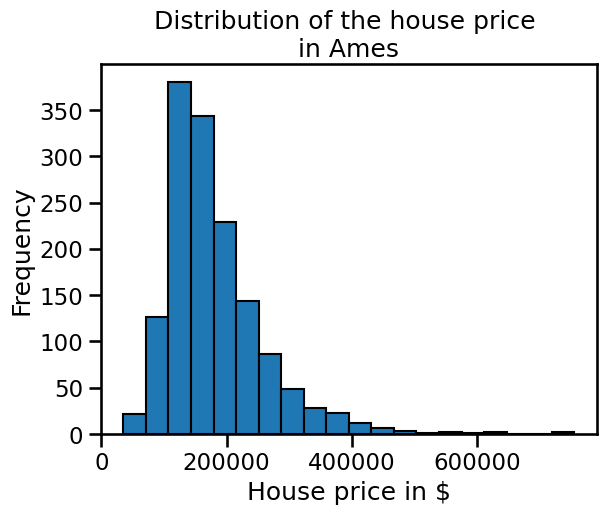

In [5]:
import matplotlib.pyplot as plt
target.plot.hist(bins=20, edgecolor="black")
plt.xlabel("House price in $")
_ = plt.title("Distribution of the house price \nin Ames")

We see that the distribution has a long tail. It means that most of the house
are normally distributed but a couple of houses have a higher than normal
value. It could be critical to take this peculiarity into account when
designing a predictive model.

Now, we can have a look at the available data that we could use to predict
house prices.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Looking at the dataframe general information, we can see that 79 features are
available and that the dataset contains 1460 samples. However, some features
contains missing values. Also, the type of data is heterogeneous: both
numerical and categorical data are available.

First, we will have a look at the data represented with numbers.

In [7]:
numerical_data = data.select_dtypes("number")
numerical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1452 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

We see that the data are mainly represented with integer number. Let's have
a look at the histogram for all these features.

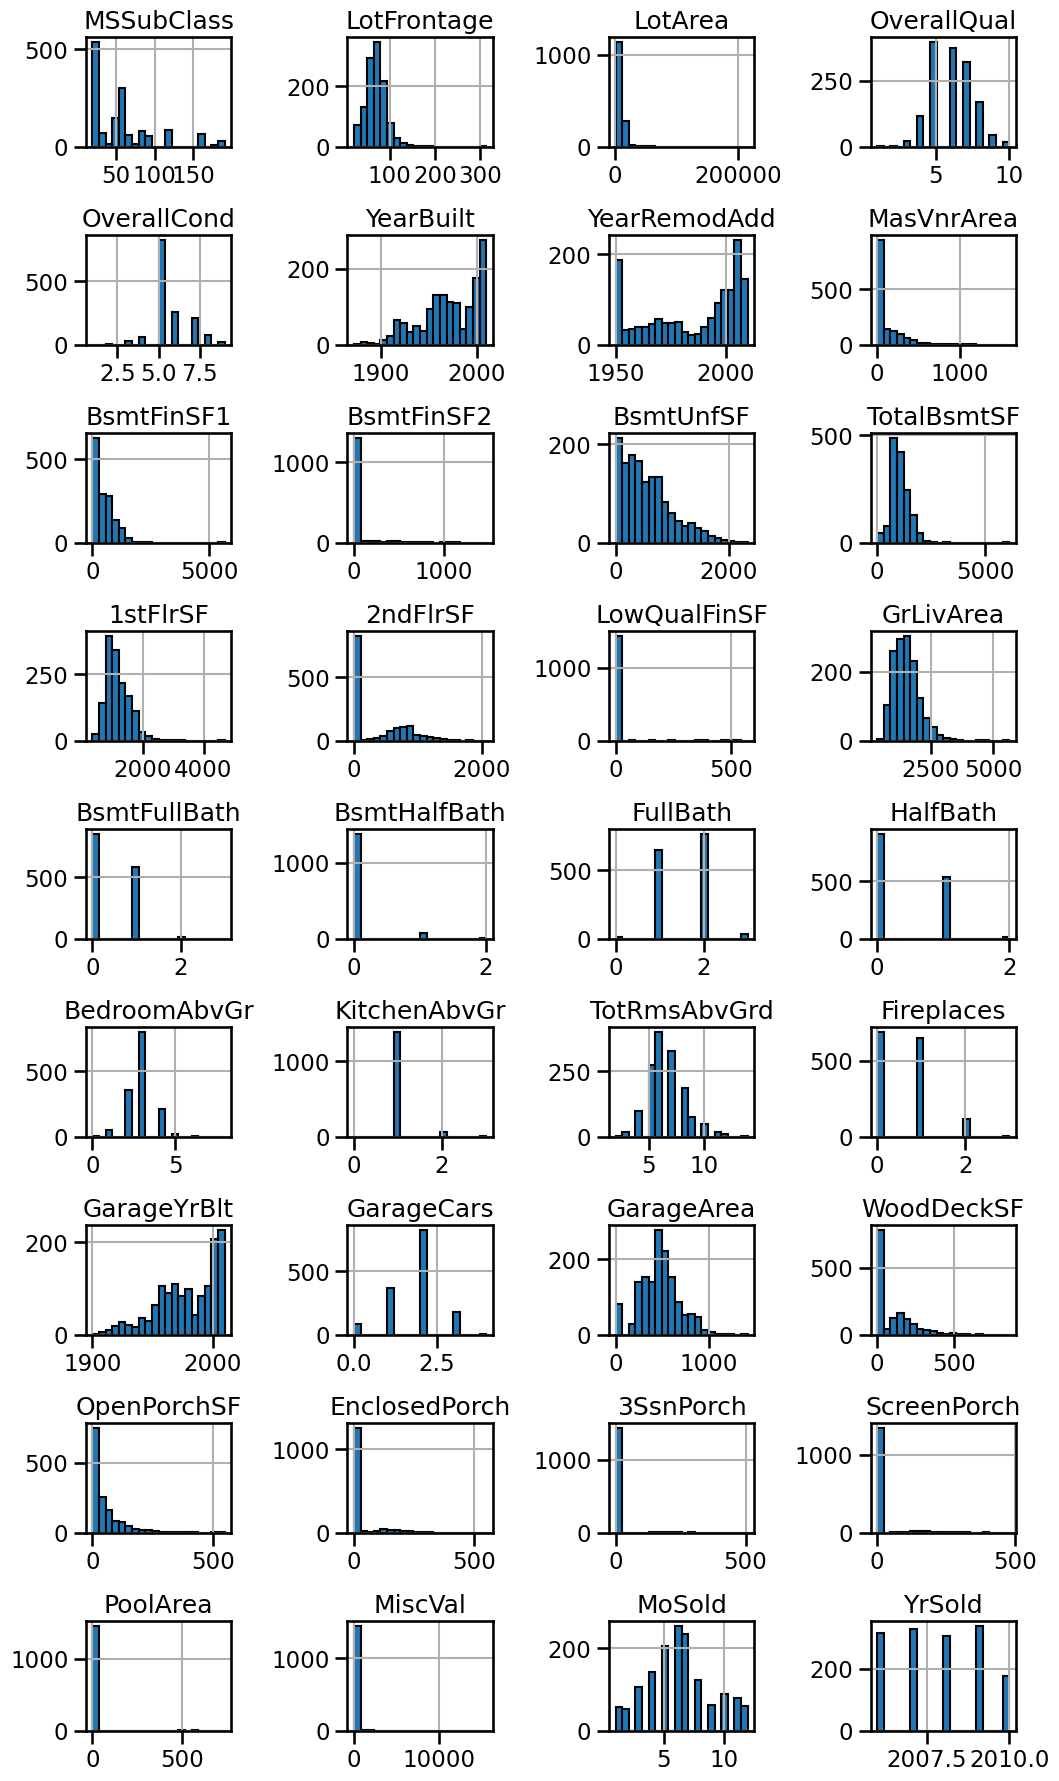

In [8]:
numerical_data.hist(bins=20, figsize=(12, 22), edgecolor="black",
                    layout=(9, 4))
plt.subplots_adjust(hspace=0.8, wspace=0.8)

We see that some features have high picks for 0. It could be linked that this
value was assigned when the criterion did not apply, for instance the
area of the swimming pool when no swimming pools are available.

We also have some feature encoding some date (for instance year).

These information are useful and should also be considered when designing a
predictive model.

Now, let's have a look at the data encoded with strings.

In [9]:
string_data = data.select_dtypes(object)
string_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     1452 non-null   object
 18  ExterQual      1460 non-null

These features are categorical. We can make some bar plot to see categories
count for each feature.

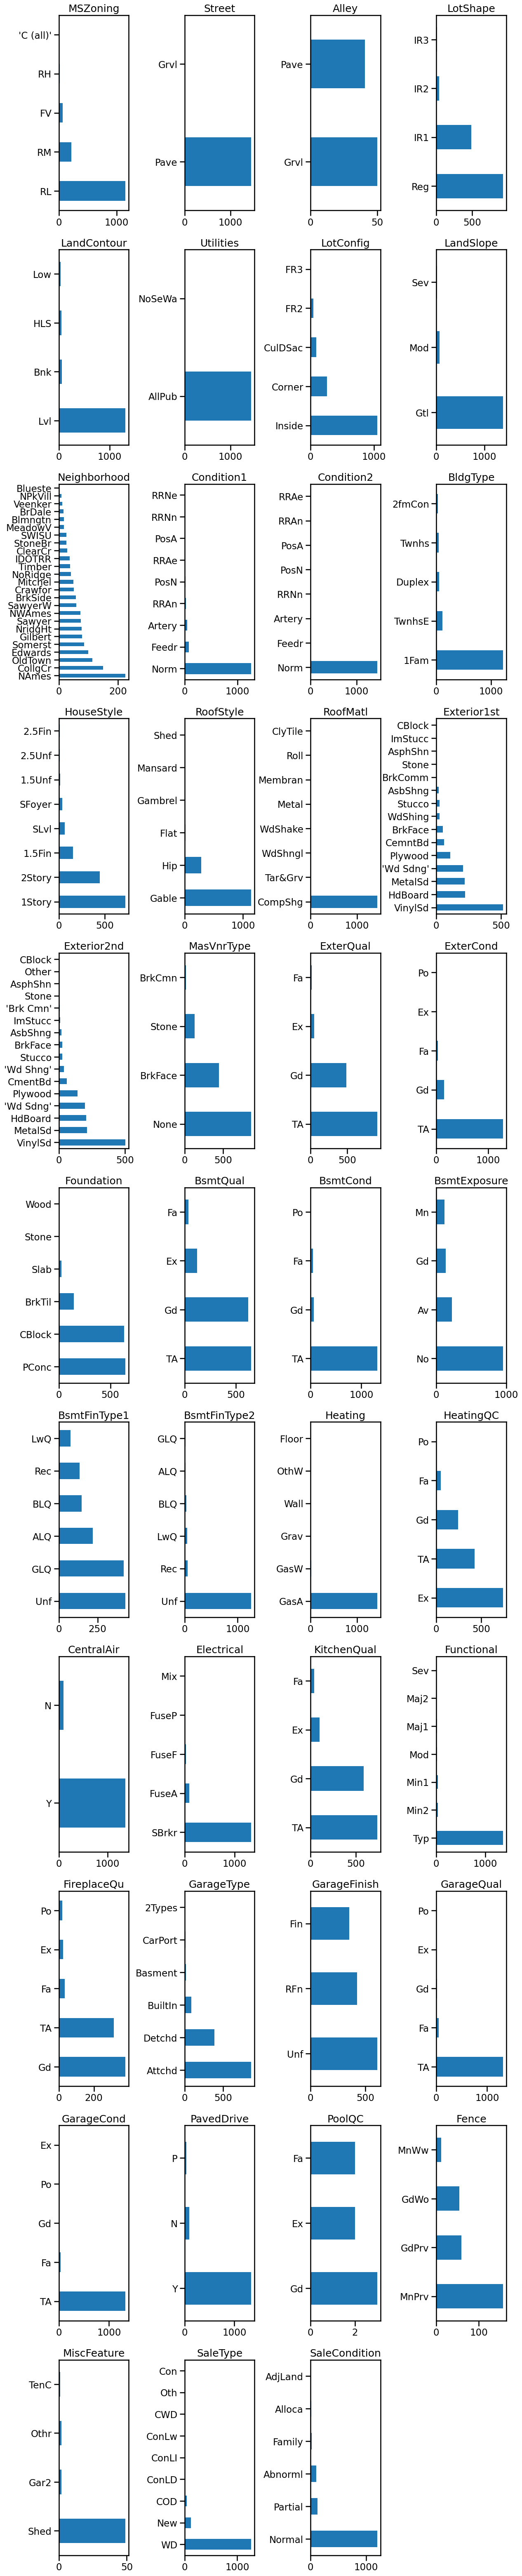

In [10]:
from math import ceil
from itertools import zip_longest

n_string_features = string_data.shape[1]
nrows, ncols = ceil(n_string_features / 4), 4

fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(14, 80))

for feature_name, ax in zip_longest(string_data, axs.ravel()):
    if feature_name is None:
        # do not show the axis
        ax.axis("off")
        continue

    string_data[feature_name].value_counts().plot.barh(ax=ax)
    ax.set_title(feature_name)

plt.subplots_adjust(hspace=0.2, wspace=0.8)

Plotting this information allows us to answer to two questions:

* Is there few or many categories for a given features?
* Is there rare categories for some features?

Knowing about these peculiarities would help at designing the predictive
pipeline.

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">In order to keep the content of the course simple and didactic, we
created a version of this database without missing values.</p>
</div>

In [11]:
ames_housing_no_missing = pd.read_csv("../datasets/ames_housing_no_missing.csv")
ames_housing_no_missing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,FR2,...,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,Inside,...,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,Corner,...,0,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,FR2,...,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal,250000


It contains the same information as the original dataset after using a
[`sklearn.impute.SimpleImputer`](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)
to replace missing values using the mean along each numerical column
(including the target), and the most frequent value along each categorical column.

In [12]:
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline


numerical_features = [
    "LotFrontage",
    "LotArea",
    "MasVnrArea",
    "BsmtFinSF1",
    "BsmtFinSF2",
    "BsmtUnfSF",
    "TotalBsmtSF",
    "1stFlrSF",
    "2ndFlrSF",
    "LowQualFinSF",
    "GrLivArea",
    "BedroomAbvGr",
    "KitchenAbvGr",
    "TotRmsAbvGrd",
    "Fireplaces",
    "GarageCars",
    "GarageArea",
    "WoodDeckSF",
    "OpenPorchSF",
    "EnclosedPorch",
    "3SsnPorch",
    "ScreenPorch",
    "PoolArea",
    "MiscVal",
    target_name,
]
categorical_features = data.columns.difference(numerical_features)

most_frequent_imputer = SimpleImputer(strategy="most_frequent")
mean_imputer = SimpleImputer(strategy="mean")

preprocessor = make_column_transformer(
    (most_frequent_imputer, categorical_features),
    (mean_imputer, numerical_features),
)
ames_housing_preprocessed = pd.DataFrame(
    preprocessor.fit_transform(ames_housing),
    columns=categorical_features.tolist() + numerical_features,
)
ames_housing_preprocessed = ames_housing_preprocessed[ames_housing.columns]
ames_housing_preprocessed = ames_housing_preprocessed.astype(ames_housing.dtypes)
(ames_housing_no_missing == ames_housing_preprocessed).all()

MSSubClass       True
MSZoning         True
LotFrontage      True
LotArea          True
Street           True
                 ... 
MoSold           True
YrSold           True
SaleType         True
SaleCondition    True
SalePrice        True
Length: 80, dtype: bool